In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy

## This notebook performs regression of age at first reproduction (as proxy for age of puberty) vs generation time, dataset taken from paper "Generation Length for Mammals", used species whose generation time was available on the IUCN Red List

In [2]:
def load_and_filter_data():
    df = pd.read_excel("./data/generation_time_for_mammals/Generation Length for Mammals.xlsx")
    df_gma = df[df["Sources_GL"] == "GMA"]
    print(f"{len(df_gma)} species where generation time is provided by IUCN Red List")
    df_gma_afr = df_gma[df_gma["AFR_d"] != "no information"]
    print(f"{len(df_gma_afr)} species left after filtering for species where AFR_d had no information")
    data = df_gma_afr[["AFR_d", "GenerationLength_d"]].to_numpy().astype("float32")
    data /= 365

    # sort by generation length, bowhead whale had a generation time of 52 years
    # df_gma_afr_sort = df_gma_afr.sort_values("GenerationLength_d", ascending=False)
    # print(df_gma_afr_sort.head())
    return data

def plot_and_regress(data):
    fig, ax = plt.subplots()
    afr, gen_time = data[:,0], data[:,1] 
    ax.scatter(gen_time, afr)
    ax.set_xlabel("generation time (years)")
    ax.set_ylabel("age at first reproduction (years)")
    
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(gen_time, afr)
    print(f"slope={slope}, intercept={intercept}, r-value: {r_value}, p-value: {p_value}")
    reg_fn = np.poly1d([slope, intercept])
    ax.plot(gen_time, reg_fn(gen_time), '--k')

439 species where generation time is provided by IUCN Red List
230 species left after filtering for species where AFR_d had no information
slope=0.4187745108094837, intercept=-0.7095257085600268, r-value: 0.8696168106782604, p-value: 7.899894044403887e-72


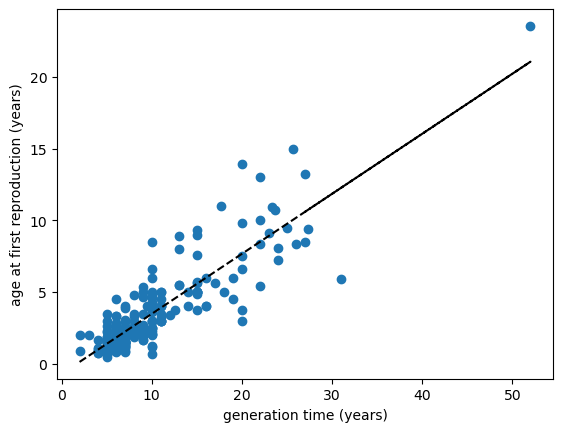

In [3]:
data = load_and_filter_data()
plot_and_regress(data)